In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
plt.style.use('seaborn-darkgrid')

**Link**: [Breast Cancer Wisconsin](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data)

Attribute Information:
- ID number
- Diagnosis (M = malignant, B = benign)

Ten real-valued features are computed for each cell nucleus:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.
Missing attribute values: none
Class distribution: 357 benign, 212 malignant

In [17]:
df = pd.read_csv("data/data.csv")

---
## **1. EXPLORE THE DATA TO GAIN INSIGHTS**
---

In [18]:
df = df.drop("Unnamed: 32", axis = 1)

In [19]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [21]:
df.nunique()

id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
dtype: i

In [22]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


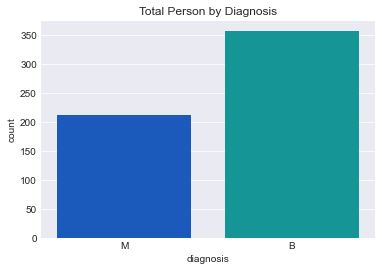

In [23]:
sns.countplot(df["diagnosis"], palette = "winter")
plt.title("Total Person by Diagnosis")
plt.show()

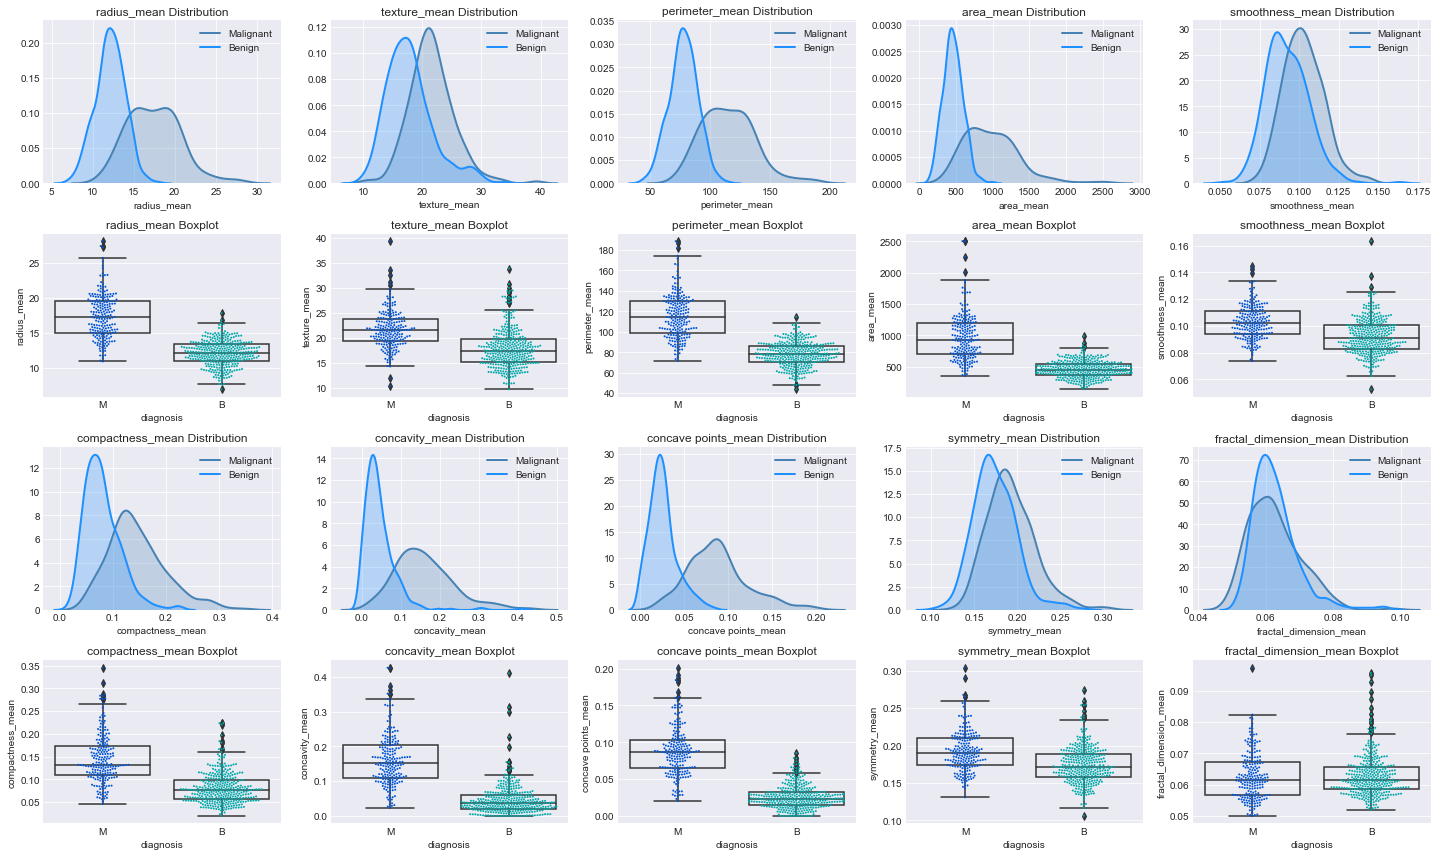

In [24]:
columns = df.columns[2:12]
fig, ax = plt.subplots(4, 5, figsize = (20, 12))
for row in range(2):
    for col in range(5):
        column = columns[row * 5 + col]
        sns.distplot(df[df["diagnosis"] == "M"][column], hist = False,
                     kde_kws = {"shade": True, "linewidth": 2}, label = "Malignant",
                     color = "steelblue", ax = ax[(row * 2), col])
        sns.distplot(df[df["diagnosis"] == "B"][column], hist = False,
                     kde_kws = {"shade": True, "linewidth": 2}, label = "Benign",
                     color = "dodgerblue", ax = ax[(row * 2), col])
        sns.boxplot(x = df["diagnosis"], y = df[column], boxprops={'facecolor':'None'}, palette = "winter", ax = ax[(row * 2) + 1, col])
        sns.swarmplot(x = df["diagnosis"], y = df[column], size = 2, palette = "winter", ax = ax[(row * 2) + 1, col])
        ax[(row * 2), col].set_title(column + " Distribution")
        ax[(row * 2) + 1, col].set_title(column + " Boxplot")
plt.tight_layout()
plt.show()
fig.savefig('data_breast_cancer.png')

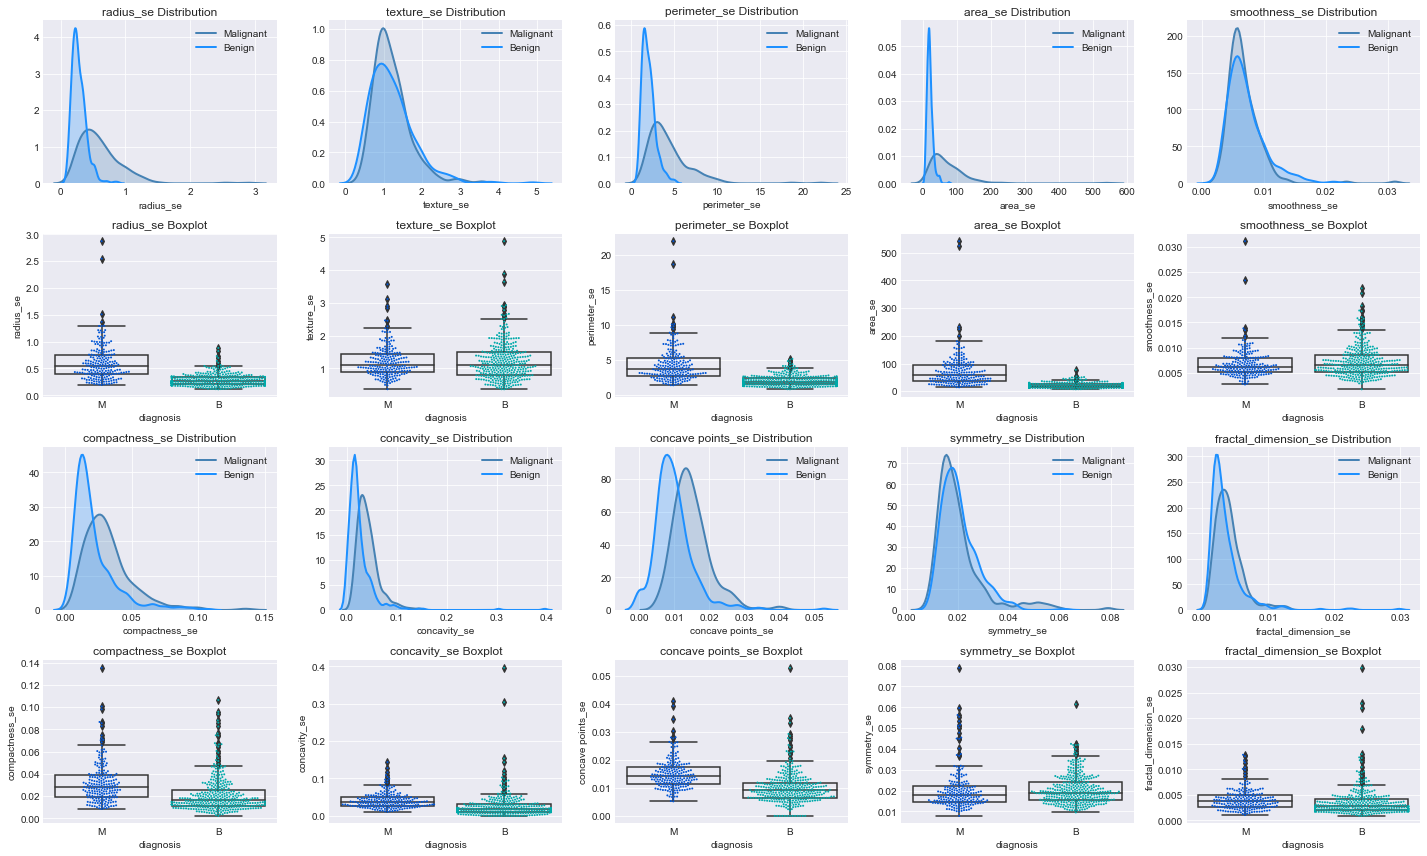

In [25]:
columns = df.columns[12:22]
fig, ax = plt.subplots(4, 5, figsize = (20, 12))
for row in range(2):
    for col in range(5):
        column = columns[row * 5 + col]
        sns.distplot(df[df["diagnosis"] == "M"][column], hist = False,
                     kde_kws = {"shade": True, "linewidth": 2}, label = "Malignant",
                     color = "steelblue", ax = ax[(row * 2), col])
        sns.distplot(df[df["diagnosis"] == "B"][column], hist = False,
                     kde_kws = {"shade": True, "linewidth": 2}, label = "Benign",
                     color = "dodgerblue", ax = ax[(row * 2), col])
        sns.boxplot(x = df["diagnosis"], y = df[column], boxprops={'facecolor':'None'}, palette = "winter", ax = ax[(row * 2) + 1, col])
        sns.swarmplot(x = df["diagnosis"], y = df[column], size = 2, palette = "winter", ax = ax[(row * 2) + 1, col])
        ax[(row * 2), col].set_title(column + " Distribution")
        ax[(row * 2) + 1, col].set_title(column + " Boxplot")
plt.tight_layout()
plt.show()

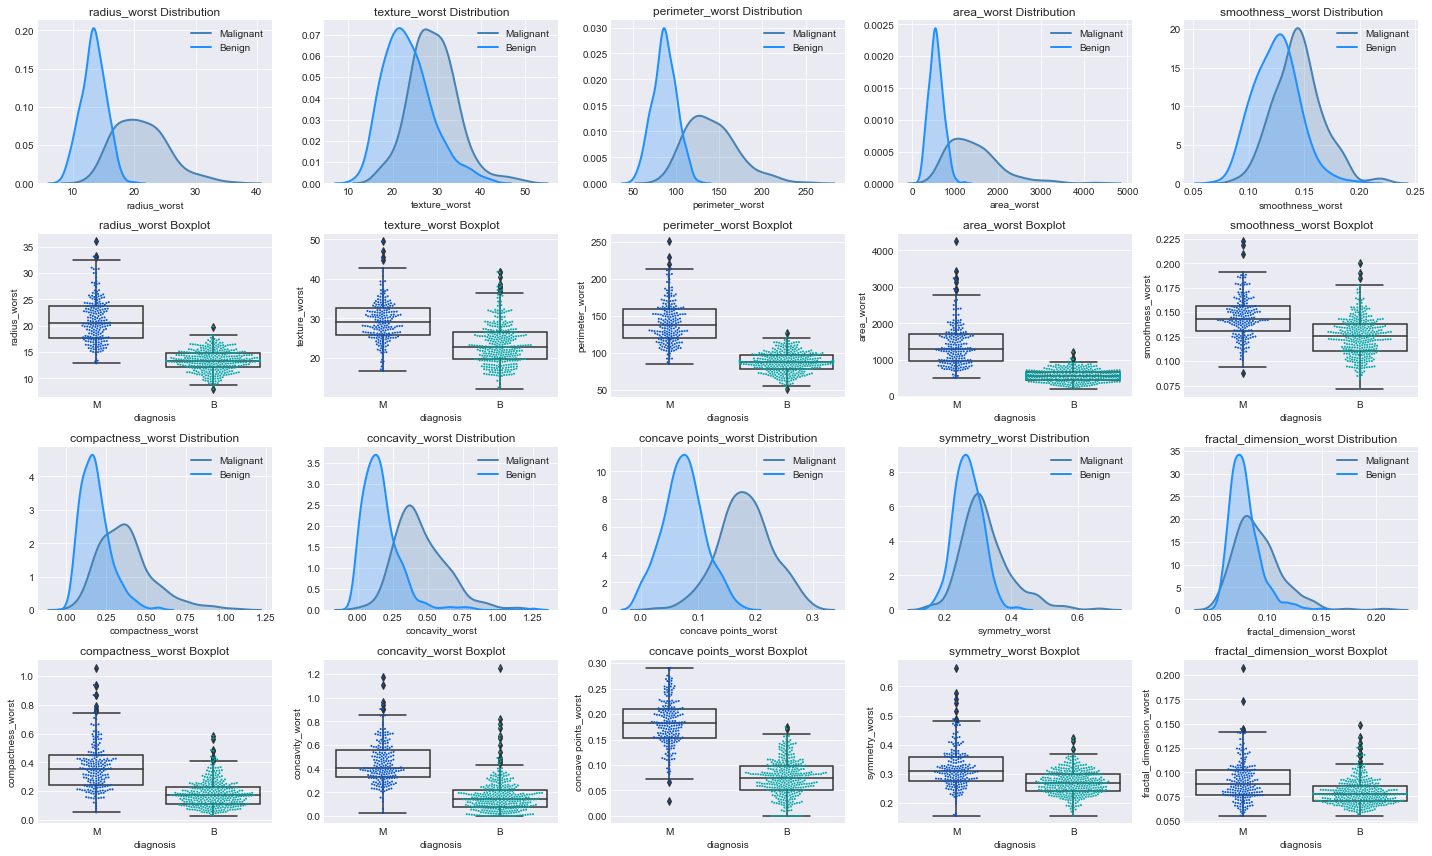

In [26]:
columns = df.columns[22:]
fig, ax = plt.subplots(4, 5, figsize = (20, 12))
for row in range(2):
    for col in range(5):
        column = columns[row * 5 + col]
        sns.distplot(df[df["diagnosis"] == "M"][column], hist = False,
                     kde_kws = {"shade": True, "linewidth": 2}, label = "Malignant",
                     color = "steelblue", ax = ax[(row * 2), col])
        sns.distplot(df[df["diagnosis"] == "B"][column], hist = False,
                     kde_kws = {"shade": True, "linewidth": 2}, label = "Benign",
                     color = "dodgerblue", ax = ax[(row * 2), col])
        sns.boxplot(x = df["diagnosis"], y = df[column], boxprops={'facecolor':'None'}, palette = "winter", ax = ax[(row * 2) + 1, col])
        sns.swarmplot(x = df["diagnosis"], y = df[column], size = 2, palette = "winter", ax = ax[(row * 2) + 1, col])
        ax[(row * 2), col].set_title(column + " Distribution")
        ax[(row * 2) + 1, col].set_title(column + " Boxplot")
plt.tight_layout()
plt.show()

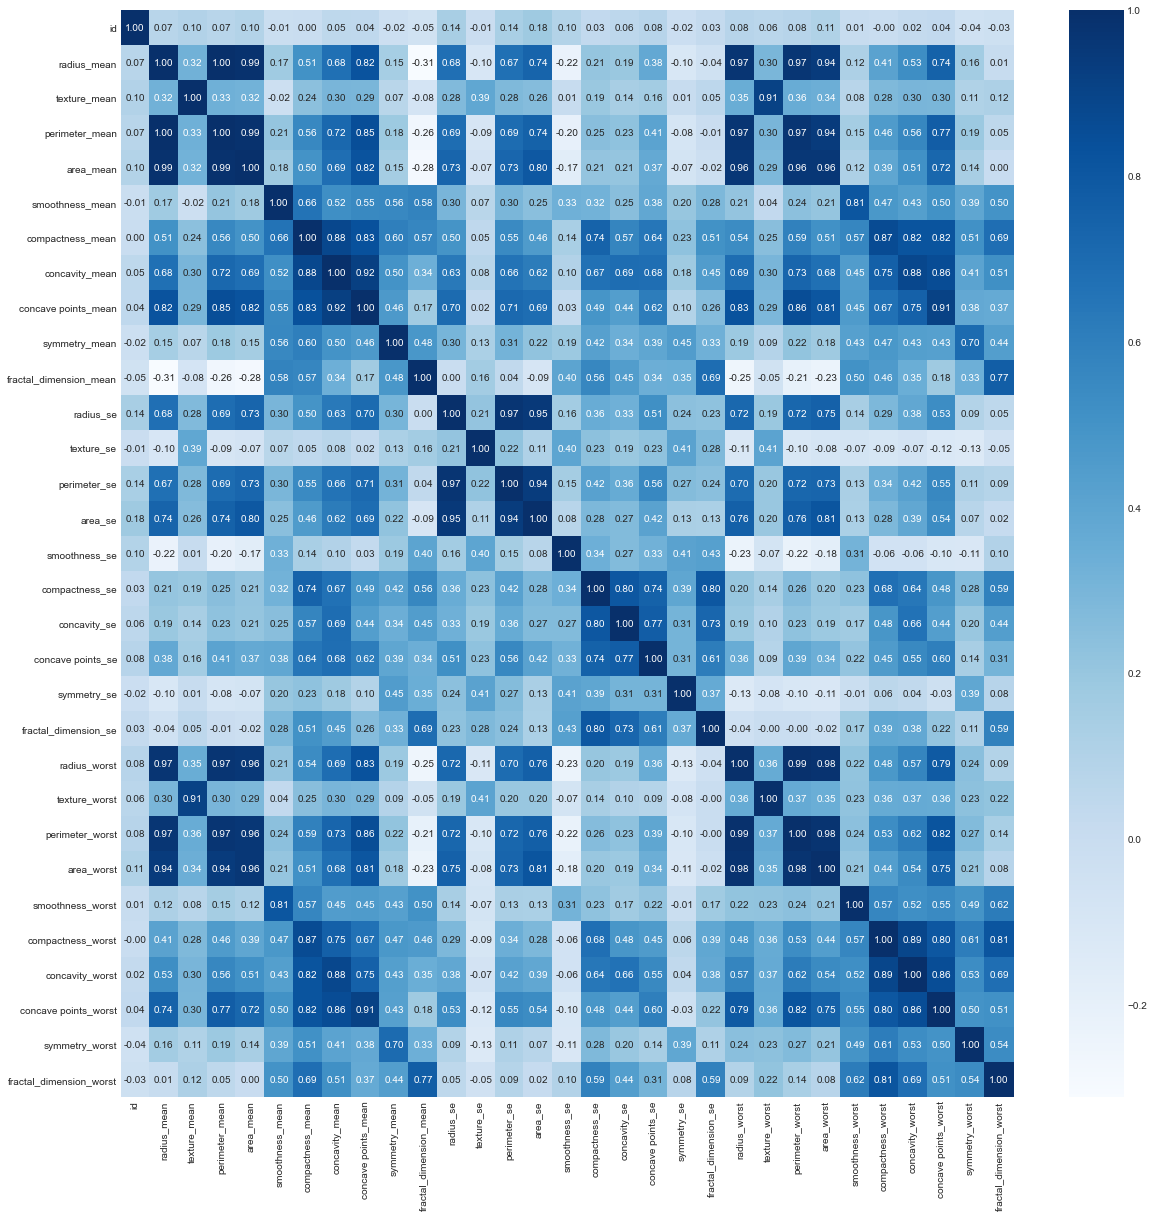

In [27]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, fmt = ".2f", cmap = "Blues")
plt.show()

In [28]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


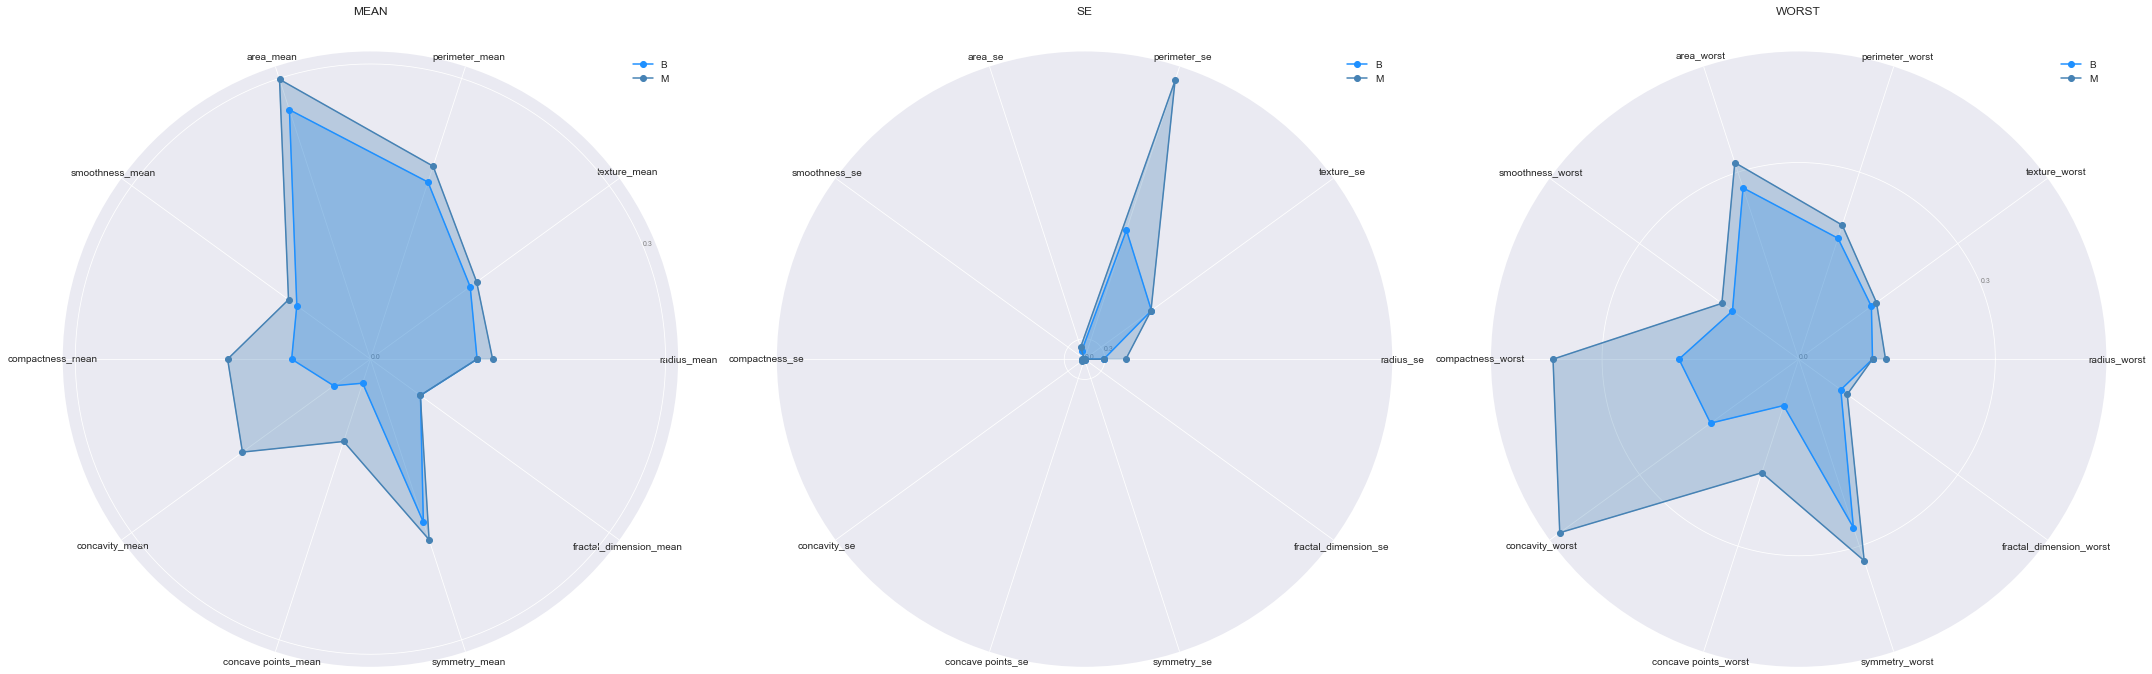

In [29]:
from math import pi
fig = plt.figure(figsize = (30, 30))
ax = plt.subplot(131, polar = True)
categories = df.columns[2:12]
N = len(categories)
values_1 = [df[df["diagnosis"] == "B"][i].mean() if df[df["diagnosis"] == "B"][i].mean() <= 10 else np.log10(df[df["diagnosis"] == "B"][i].mean())/10 for i in categories]
values_1 += values_1[:1]
values_2 = [df[df["diagnosis"] == "M"][i].mean() if df[df["diagnosis"] == "M"][i].mean() <= 10 else np.log10(df[df["diagnosis"] == "M"][i].mean())/10 for i in categories]
values_2 += values_1[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.polar(angles, values_1, marker = "o", color = "dodgerblue", label = "B")
plt.polar(angles, values_2, marker = "o", color = "steelblue", label = "M")
plt.fill(angles, values_1, color = "dodgerblue", alpha = 0.3)
plt.fill(angles, values_2, color = "steelblue", alpha = 0.3)
plt.yticks([0, 0.3], color = "grey", size = 7)
plt.xticks(angles[:-1], categories)
plt.legend()
plt.title("MEAN")

ax = plt.subplot(132, polar = True)
categories = df.columns[12:22]
N = len(categories)
values_1 = [df[df["diagnosis"] == "B"][i].mean() if df[df["diagnosis"] == "B"][i].mean() <= 10 else np.log10(df[df["diagnosis"] == "B"][i].mean())/10 for i in categories]
values_1 += values_1[:1]
values_2 = [df[df["diagnosis"] == "M"][i].mean() if df[df["diagnosis"] == "M"][i].mean() <= 10 else np.log10(df[df["diagnosis"] == "M"][i].mean())/10 for i in categories]
values_2 += values_1[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.polar(angles, values_1, marker = "o", color = "dodgerblue", label = "B")
plt.polar(angles, values_2, marker = "o", color = "steelblue", label = "M")
plt.fill(angles, values_1, color = "dodgerblue", alpha = 0.3)
plt.fill(angles, values_2, color = "steelblue", alpha = 0.3)
plt.yticks([0, 0.3], color = "grey", size = 7)
plt.xticks(angles[:-1], categories)
plt.legend()
plt.title("SE")

ax = plt.subplot(133, polar = True)
categories = df.columns[22:]
N = len(categories)
values_1 = [df[df["diagnosis"] == "B"][i].mean() if df[df["diagnosis"] == "B"][i].mean() <= 10 else np.log10(df[df["diagnosis"] == "B"][i].mean())/10 for i in categories]
values_1 += values_1[:1]
values_2 = [df[df["diagnosis"] == "M"][i].mean() if df[df["diagnosis"] == "M"][i].mean() <= 10 else np.log10(df[df["diagnosis"] == "M"][i].mean())/10 for i in categories]
values_2 += values_1[:1]
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
plt.polar(angles, values_1, marker = "o", color = "dodgerblue", label = "B")
plt.polar(angles, values_2, marker = "o", color = "steelblue", label = "M")
plt.fill(angles, values_1, color = "dodgerblue", alpha = 0.3)
plt.fill(angles, values_2, color = "steelblue", alpha = 0.3)
plt.yticks([0, 0.3], color = "grey", size = 7)
plt.xticks(angles[:-1], categories)
plt.legend()
plt.title("WORST")

plt.tight_layout()
plt.show()

---
## **2. PREPARE THE DATA**
---

In [99]:
df = pd.concat([df, pd.DataFrame(pd.get_dummies(df["diagnosis"], prefix = "diagnosis", drop_first = True))], axis = 1)
df = df.drop("diagnosis", axis = 1)

In [108]:
from sklearn.model_selection import train_test_split

In [110]:
X = df.drop(["id", "diagnosis_M"], axis = 1).values
y = df["diagnosis_M"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 0)

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

---
## **3. EXPLORE MANY DIFFERENT MODELS**
---

In [113]:
# Algorithm
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, CategoricalNB, BernoulliNB
from sklearn.tree import DecisionTreeClassifier

# Dimensionality Reduction
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis

#Metrics
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, plot_confusion_matrix, roc_curve, precision_recall_curve

#Validation
from sklearn.model_selection import cross_validate, cross_val_predict

#Hyper Parameter
from sklearn.model_selection import GridSearchCV

#Ensemble
from sklearn.ensemble import VotingClassifier

In [114]:
algorithm = {
    'Logistic Regression': LogisticRegression(),
    'Ridge Classifier': RidgeClassifier(),
    'K Neighbors Classifier': KNeighborsClassifier(),
    'SGD Classifier': SGDClassifier(),
    'Perceptron': Perceptron(),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(),
    'Decision Tree Classifier': DecisionTreeClassifier()
}

In [115]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', 'precision', 'recall', 'f1'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [116]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_precision': 'Precision',
                                  'test_recall': 'Recall',
                                  'test_f1': 'F1',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_f1std': 'F1 Std'
                                 })

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

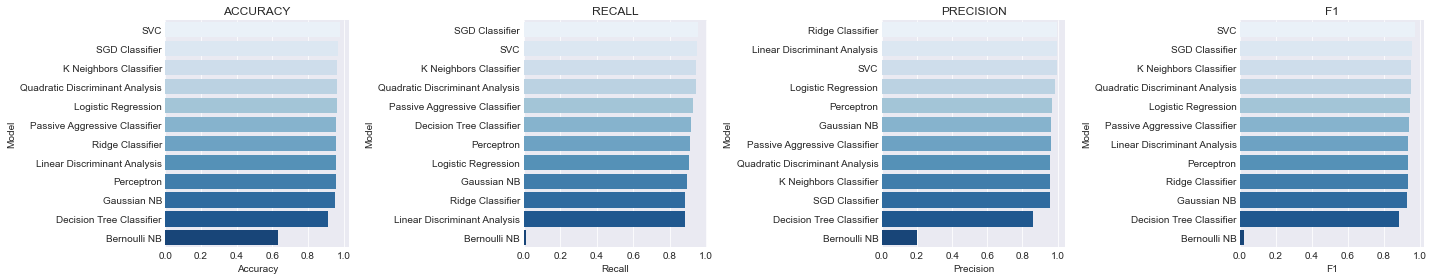

In [117]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'Blues', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'Blues', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'Blues', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'Blues', ax = ax[3])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
plt.tight_layout()
plt.show()

**LOGISTIC REGRESSION**

In [123]:
model = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 1500)
parameters = {"C": np.linspace(0.2, 1, 5), "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=1500, penalty='elasticnet',
                                          solver='saga'),
             param_grid={'C': array([0.2, 0.4, 0.6, 0.8, 1. ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='accuracy')

In [124]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
28,0.057844,0.003939,0.000599,0.000489,1,0.8,"{'C': 1.0, 'l1_ratio': 0.8}",0.956522,0.934783,0.956522,...,0.97066,0.973105,0.97555,0.97561,0.970732,0.97561,0.968293,0.968293,0.971673,0.00293


In [126]:
model = LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 200, C = 1, l1_ratio = 0.8)
model.fit(X_train, y_train)

LogisticRegression(C=1, l1_ratio=0.8, max_iter=200, penalty='elasticnet',
                   solver='saga')

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       290
           1       0.99      0.93      0.96       165

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



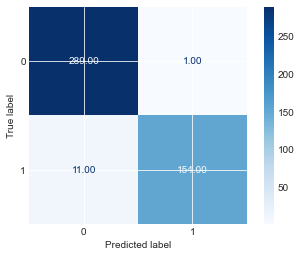

In [127]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**RIDGE**

In [128]:
model = RidgeClassifier()
parameters = {"alpha": np.linspace(1, 10, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RidgeClassifier(),
             param_grid={'alpha': array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.])},
             return_train_score=True, scoring='accuracy')

In [129]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004484,0.001903,0.000299,0.000457,1,{'alpha': 1.0},0.956522,0.934783,0.956522,0.956522,...,0.96088,0.958435,0.963325,0.960976,0.960976,0.956098,0.963415,0.95122,0.959708,0.003477


In [130]:
model = RidgeClassifier(alpha = 1)
model.fit(X_train, y_train)

RidgeClassifier(alpha=1)

              precision    recall  f1-score   support

           0       0.94      1.00      0.97       290
           1       0.99      0.90      0.94       165

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



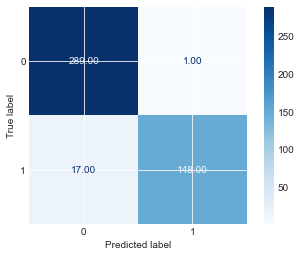

In [131]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**KNN**

In [132]:
model = KNeighborsClassifier()
parameters = {"n_neighbors": range(2, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(2, 11)}, return_train_score=True,
             scoring='accuracy')

In [133]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
2,0.002094,0.000299,0.004291,0.000906,4,{'n_neighbors': 4},0.956522,0.956522,0.978261,0.956522,...,0.977995,0.98044,0.98044,0.97561,0.97561,0.982927,0.973171,0.980488,0.978756,0.002886


In [134]:
model = KNeighborsClassifier(n_neighbors = 4)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       290
           1       1.00      0.94      0.97       165

    accuracy                           0.98       455
   macro avg       0.98      0.97      0.98       455
weighted avg       0.98      0.98      0.98       455



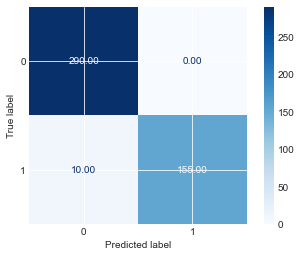

In [135]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SGD**

In [136]:
model = SGDClassifier(penalty = "elasticnet")
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1], "l1_ratio": np.linspace(0, 1, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SGDClassifier(penalty='elasticnet'),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             return_train_score=True, scoring='accuracy')

In [137]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_l1_ratio,params,split0_test_score,split1_test_score,split2_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
8,0.002792,0.000599,0.000399,0.000489,0.001,0.4,"{'alpha': 0.001, 'l1_ratio': 0.4}",0.978261,0.978261,0.978261,...,0.968215,0.97555,0.977995,0.968293,0.97561,0.978049,0.980488,0.960976,0.97485,0.006545


In [139]:
model = SGDClassifier(penalty = "elasticnet", alpha = 0.001, l1_ratio = 0.4)
model.fit(X_train, y_train)

SGDClassifier(alpha=0.001, l1_ratio=0.4, penalty='elasticnet')

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       290
           1       0.99      0.96      0.98       165

    accuracy                           0.98       455
   macro avg       0.99      0.98      0.98       455
weighted avg       0.98      0.98      0.98       455



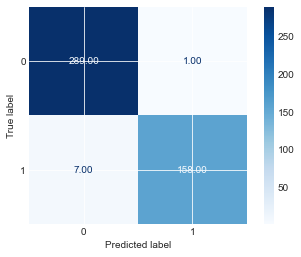

In [140]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PERCEPTRON**

In [141]:
model = Perceptron()
parameters = {"alpha": [0.0001, 0.001, 0.01, 0.1]}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Perceptron(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1]},
             return_train_score=True, scoring='accuracy')

In [142]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002988,0.00118,0.000698,0.000457,0.0001,{'alpha': 0.0001},0.934783,0.891304,0.978261,0.956522,...,0.977995,0.963325,0.968215,0.973171,0.95122,0.985366,0.980488,0.97561,0.971915,0.009472


In [143]:
model = Perceptron(alpha = 0.0001)
model.fit(X_train, y_train)

Perceptron()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       290
           1       1.00      0.91      0.95       165

    accuracy                           0.97       455
   macro avg       0.98      0.95      0.96       455
weighted avg       0.97      0.97      0.97       455



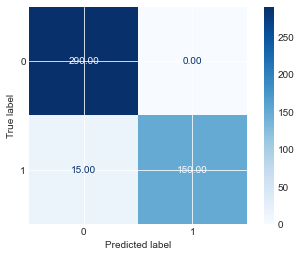

In [144]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**PASSIVE AGGRESIVE**

In [145]:
model = PassiveAggressiveClassifier()
parameters = {"C": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=PassiveAggressiveClassifier(),
             param_grid={'C': range(1, 11)}, return_train_score=True,
             scoring='accuracy')

In [146]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
7,0.001595,0.000661,0.000399,0.000488,8,{'C': 8},0.934783,0.978261,0.978261,0.934783,...,0.977995,0.97555,0.98533,0.982927,0.946341,0.968293,0.973171,0.970732,0.972655,0.010153


In [147]:
model = PassiveAggressiveClassifier(C = 8)
model.fit(X_train, y_train)

PassiveAggressiveClassifier(C=8)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       290
           1       1.00      0.93      0.96       165

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455



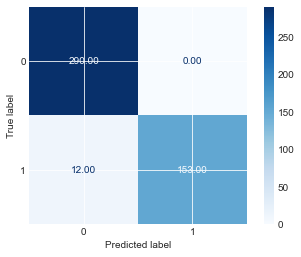

In [148]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**LDA**

In [149]:
model = LinearDiscriminantAnalysis()
parameters = {"solver": ('svd', 'lsqr', 'eigen')}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LinearDiscriminantAnalysis(),
             param_grid={'solver': ('svd', 'lsqr', 'eigen')},
             return_train_score=True, scoring='accuracy')

In [150]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_solver,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.007883,0.009244,0.000295,0.000451,svd,{'solver': 'svd'},0.956522,0.956522,0.978261,0.934783,...,0.96088,0.96577,0.96577,0.958537,0.956098,0.960976,0.960976,0.958537,0.961419,0.003012


In [151]:
model = LinearDiscriminantAnalysis(solver = "svd")
model.fit(X_train, y_train)

LinearDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       290
           1       0.99      0.90      0.95       165

    accuracy                           0.96       455
   macro avg       0.97      0.95      0.96       455
weighted avg       0.96      0.96      0.96       455



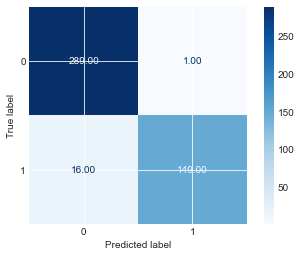

In [152]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**QDA**

In [153]:
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)

QuadraticDiscriminantAnalysis()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       290
           1       0.98      0.95      0.96       165

    accuracy                           0.97       455
   macro avg       0.97      0.97      0.97       455
weighted avg       0.97      0.97      0.97       455



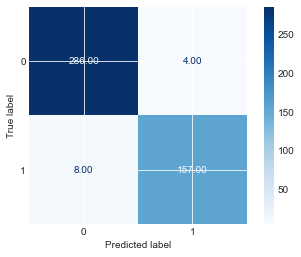

In [154]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**SVC**

In [155]:
model = SVC()
parameters = {"C": range(1, 11)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(), param_grid={'C': range(1, 11)},
             return_train_score=True, scoring='accuracy')

In [156]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
5,0.003989,0.000446,0.000399,0.000488,6,{'C': 6},1.0,1.0,0.978261,0.978261,...,0.99022,0.99022,0.992665,0.990244,0.987805,0.987805,0.987805,0.987805,0.988767,0.001952


In [157]:
model = SVC(C = 6)
model.fit(X_train, y_train)

SVC(C=6)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       290
           1       1.00      0.97      0.98       165

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



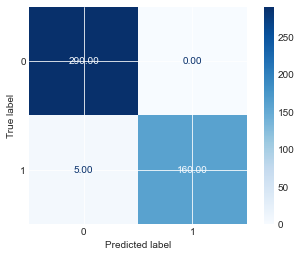

In [158]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**GAUSSIAN NB**

In [159]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       290
           1       0.95      0.90      0.92       165

    accuracy                           0.95       455
   macro avg       0.95      0.94      0.94       455
weighted avg       0.95      0.95      0.95       455



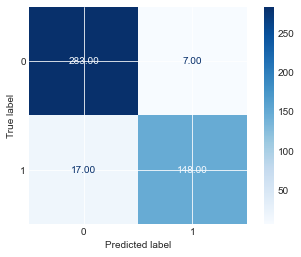

In [160]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**BERNOULLI NB**

In [161]:
model = BernoulliNB()
parameters = {"alpha": np.linspace(0.1, 1, 10)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=BernoulliNB(),
             param_grid={'alpha': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             return_train_score=True, scoring='accuracy')

In [162]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.002096,0.000832,0.0008,0.000748,0.1,{'alpha': 0.1},0.608696,0.652174,0.630435,0.630435,...,0.643032,0.643032,0.643032,0.641463,0.641463,0.641463,0.641463,0.639024,0.641759,0.001252


In [163]:
model = BernoulliNB(alpha = 0.1)
model.fit(X_train, y_train)

BernoulliNB(alpha=0.1)

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       290
           1       1.00      0.01      0.02       165

    accuracy                           0.64       455
   macro avg       0.82      0.51      0.40       455
weighted avg       0.77      0.64      0.51       455



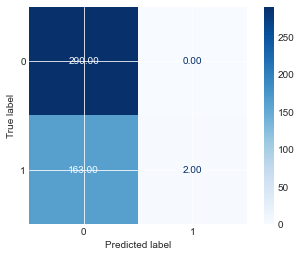

In [164]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**DECISION TREE**

In [165]:
model = DecisionTreeClassifier()
parameters = {"max_depth": range(2, 6), "min_samples_split": range(2, 6), "min_samples_leaf": range(2, 6)}
gscv = GridSearchCV(model, param_grid = parameters, cv = 10, return_train_score = True, scoring = "accuracy")
gscv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(2, 6),
                         'min_samples_leaf': range(2, 6),
                         'min_samples_split': range(2, 6)},
             return_train_score=True, scoring='accuracy')

In [166]:
gscv_res = pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")
gscv_res.head(1)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
51,0.006482,0.000665,0.000499,0.000499,5,2,5,"{'max_depth': 5, 'min_samples_leaf': 2, 'min_s...",0.956522,0.934783,...,0.982885,0.98533,0.98533,0.987805,0.982927,0.982927,0.982927,0.982927,0.984616,0.0019


In [167]:
model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = 5)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=5)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       290
           1       1.00      0.97      0.98       165

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



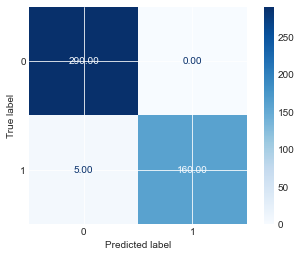

In [168]:
y_pred = model.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(model, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

**FINAL CHECK**

In [169]:
algorithm = {
    'Logistic Regression': LogisticRegression(penalty = "elasticnet", solver = "saga", max_iter = 200, C = 1, l1_ratio = 0.8),
    'Ridge Classifier': RidgeClassifier(alpha = 1),
    'K Neighbors Classifier': KNeighborsClassifier(n_neighbors = 4),
    'SGD Classifier': SGDClassifier(penalty = "elasticnet", alpha = 0.001, l1_ratio = 0.4),
    'Perceptron': Perceptron(alpha = 0.0001),
    'Passive Aggressive Classifier': PassiveAggressiveClassifier(C = 8),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(solver = "svd"),
    'Quadratic Discriminant Analysis': QuadraticDiscriminantAnalysis(),
    'SVC': SVC(C = 6),
    'Gaussian NB': GaussianNB(),
    'Bernoulli NB': BernoulliNB(alpha = 0.1),
    'Decision Tree Classifier': DecisionTreeClassifier(max_depth = 5, min_samples_leaf = 2, min_samples_split = 5)
}

In [170]:
def get_scoring(model):
    scores = {}
    score = cross_validate(estimator = model, X = X_train, y = y_train, cv = 10,
                  scoring = ['accuracy', 'precision', 'recall', 'f1'])
    for key, value in score.items():
        scores[key] = (round(value.mean(),4))
        scores[key + 'std'] = (round(value.std(),4))
    return scores

In [171]:
results = {}
parameter = None
for key, value in algorithm.items():
    results[key] = get_scoring(value)
results = pd.DataFrame(results)
results = results.rename(index = {'fit_time': 'Fit Time',
                                  'score_time': 'Score Time',
                                  'test_accuracy': 'Accuracy',
                                  'test_precision': 'Precision',
                                  'test_recall': 'Recall',
                                  'test_f1': 'F1',
                                  'score_timestd': 'Score Time Std',
                                  'test_accuracystd': 'Accuracy Std',
                                  'test_precisionstd': 'Precision Std',
                                  'test_recallstd': 'Recall Std',
                                  'test_f1std': 'F1 Std'
                                 })

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is i

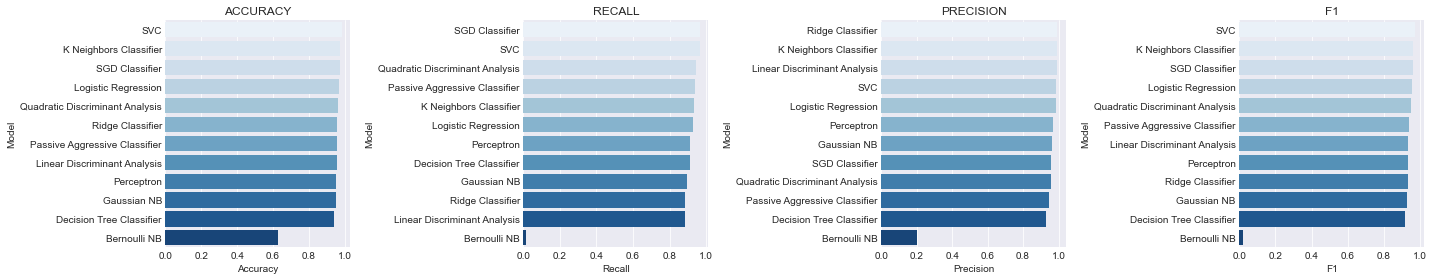

In [172]:
results = results.T.reset_index()
results.rename(columns = {'index': 'Model'}, inplace = True)
results.drop(['Fit Time', 'fit_timestd', 'Score Time', 'Score Time Std'], axis = 1, inplace = True)

# ALGORITHM COMPARISON
fig, ax = plt.subplots(1, 4, figsize = (20, 4))
sns.barplot(x = 'Accuracy', y = 'Model', data = results.sort_values('Accuracy', ascending = False), palette = 'Blues', ax = ax[0])
sns.barplot(x = 'Recall', y = 'Model', data = results.sort_values('Recall', ascending = False), palette = 'Blues', ax = ax[1])
sns.barplot(x = 'Precision', y = 'Model', data = results.sort_values('Precision', ascending = False), palette = 'Blues', ax = ax[2])
sns.barplot(x = 'F1', y = 'Model', data = results.sort_values('F1', ascending = False), palette = 'Blues', ax = ax[3])
ax[0].set_title("ACCURACY")
ax[1].set_title("RECALL")
ax[2].set_title("PRECISION")
ax[3].set_title("F1")
plt.tight_layout()
plt.show()

In [173]:
results

,Model,Accuracy,Accuracy Std,Precision,Precision Std,Recall,Recall Std,F1,F1 Std
0,Logistic Regression,0.9694,0.0223,0.9875,0.0250,0.9283,0.0519,0.9562,0.0317
1,Ridge Classifier,0.9562,0.0217,0.9941,0.0176,0.8857,0.0614,0.9354,0.0332
2,K Neighbors Classifier,0.9738,0.0162,0.9941,0.0176,0.9342,0.0411,0.9627,0.0230
3,SGD Classifier,0.9715,0.0196,0.9594,0.0364,0.9643,0.0393,0.9611,0.0266
4,Perceptron,0.9540,0.0264,0.9689,0.0653,0.9099,0.0541,0.9356,0.0338
5,Passive Aggressive Classifier,0.9562,0.0194,0.9470,0.0569,0.9397,0.0756,0.9392,0.0278
6,Linear Discriminant Analysis,0.9561,0.0137,0.9938,0.0188,0.8849,0.0318,0.9358,0.0199
7,Quadratic Discriminant Analysis,0.9648,0.0224,0.9584,0.0379,0.9452,0.0425,0.9511,0.0311
8,SVC,0.9825,0.0214,0.9879,0.0243,0.9643,0.0541,0.9750,0.0313
9,Gaussian NB,0.9496,0.0238,0.9625,0.0415,0.8974,0.0373,0.9283,0.0331


---
## **4. FINE TUNE YOUR MODELS AND COMBINE THEM INTO A GREAT SOLUTION**
---

We will use voting classifier to increase our model performance.
- We choose Logistic Regression, Ridge Regression, SGD, LDA, and Bernoulli because they have the highest accuracy score
- We get train Accuracy = 0.84
- We get train Precision = 0.84
- We get train Recall = 0.88

After we run using test data
- We get test Accuracy = 0.91
- We get test Precision = 0.88
- We get test Recall = 0.97

The model have done the work very well and this model is good to use.

In [174]:
clf1 = SGDClassifier(penalty = "elasticnet", alpha = 0.001, l1_ratio = 0.4)
clf2 = SVC(C = 6)
clf3 = QuadraticDiscriminantAnalysis()
clf4 = PassiveAggressiveClassifier(C = 8)
clf5 = KNeighborsClassifier(n_neighbors = 4)
eclf = VotingClassifier(estimators=[("alg1", clf1), ("alg2", clf2), ("alg3", clf3), ("alg4", clf4), ("alg5", clf5)], voting='hard')
eclf = eclf.fit(X_train, y_train)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       290
           1       1.00      0.97      0.98       165

    accuracy                           0.99       455
   macro avg       0.99      0.98      0.99       455
weighted avg       0.99      0.99      0.99       455



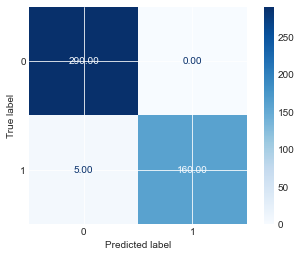

In [175]:
y_pred = eclf.predict(X_train)
print(classification_report(y_train, y_pred))
plot_confusion_matrix(eclf, X_train, y_train, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        67
           1       0.98      0.96      0.97        47

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



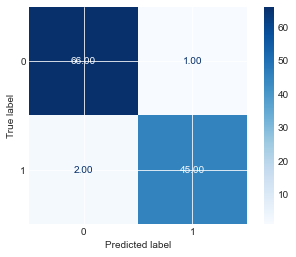

In [176]:
y_pred = eclf.predict(X_test)
print(classification_report(y_test, y_pred))
plot_confusion_matrix(eclf, X_test, y_test, cmap = plt.cm.Blues, values_format = '.2f')
plt.show()

---
## **4. FINE TUNE YOUR MODELS AND COMBINE THEM INTO A GREAT SOLUTION**
---